In [1]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import numpy as np

class linapprox:
    """
    f : function
    a : the start of interval
    b : the start of interval
    n : the number of separation
    """
    def __init__(self, f, a, b, n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n
        
        # Generating grid
        self.step = (b - a)/ n
        self.grid = [a + self.step * i  for i in range(n+1)]
        
    def interval(self, x):
        if x < self.a or x > self.b:
            raise ValueError("x must be in [a,b]")
        # Searching an interval that includes x
        stpoint = self.a
        while stpoint + self.step < x:
            stpoint += self.step
        edpoint = stpoint + self.step
        return stpoint, edpoint
        
    
    def __call__(self, x):
        stpoint, edpoint = self.interval(x)
        return (self.f(edpoint)-self.f(stpoint))/(edpoint-stpoint) * (x-stpoint) + self.f(stpoint)
    
    def plot(self, x):
        value = [f(v) for v in self.grid]
        stpoint, edpoint = self.interval(x)
        
        axis = np.linspace(self.a, self.b)
        plt.plot(axis,f(axis))
        plt.plot(self.grid,value)
        plt.plot([x],[self(x)], 'o')
        plt.show()
        
    def error(self, x):
        stpoint, edpoint = self.interval(x)        
        return self(x)-f(x)     


approximate value:   0.05999999999999999
error:               0.032999999999999995


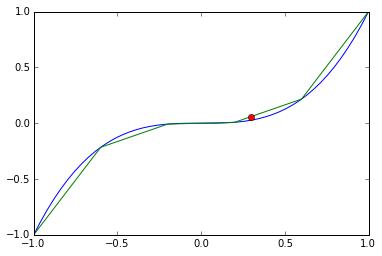

In [12]:
def f(x):
    return x ** 3

lin = linapprox(f, -1, 1, 5)
x = 0.3

print("approximate value: ".ljust(20),lin(x))
print("error: ".ljust(20),lin.error(x))
lin.plot(x)

approximate value:   0.878882124305
error:               -0.118612862299


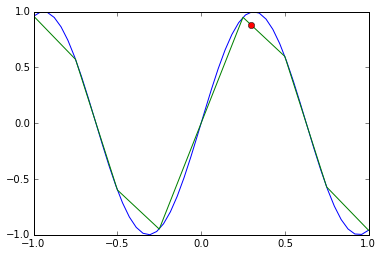

In [13]:
def f(x):
    return np.sin(5 * x)

lin = linapprox(f, -1, 1, 8)
x = 0.3

print("approximate value: ".ljust(20),lin(x))
print("error: ".ljust(20),lin.error(x))
lin.plot(x)

Error converges to 0 as $n$ increases.

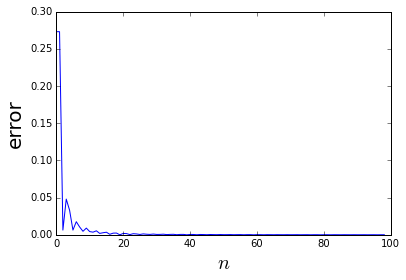

In [14]:
def f(x):
    return x ** 3



x = 0.3
errorlist = [linapprox(f, -1, 1, n).error(x) for n in range(1,100)]

plt.plot(errorlist, 'b-')
plt.xlabel("$n$", fontsize=20)
plt.ylabel("error", fontsize=20)
plt.show()

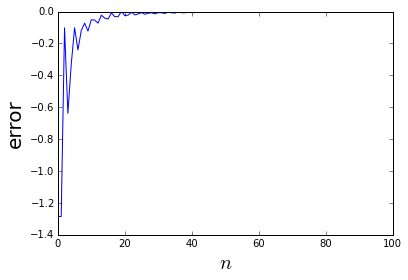

In [15]:
def f(x):
    return np.sin(5 * x)

x = 0.3
errorlist = [linapprox(f, -1, 1, n).error(x) for n in range(1,100)]

plt.plot(errorlist, 'b-')
plt.xlabel("$n$", fontsize=20)
plt.ylabel("error", fontsize=20)
plt.show()